In [1]:
%cd /home/heydar/me/BSC/FinalPorject/lsh

/home/heydar/me/BSC/FinalPorject/lsh


In [2]:
import numpy as np
from time import time

# Loading Dataset
## Preparing Dataset from sickit-learn
In this example our dataset is a news group dataset.

In [3]:
import pandas as pd
data=pd.read_csv('/media/heydar/extra2/BSC/LSH_DATASET/SnappFOod/Snappfood - Sentiment Analysis.csv' , on_bad_lines='skip' , delimiter='\t')

In [4]:
data

,Unnamed: 0,comment,label,label_id
0,NaN,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1.0
1,NaN,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0.0
2,NaN,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1.0
3,NaN,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0.0
4,NaN,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0.0
...,...,...,...,...
69995,NaN,سلام من به فاکتور غذاهایی که سفارش میدم احتیاج...,SAD,1.0
69996,NaN,سایز پیتزا نسبت به سفارشاتی که قبلا گذشتم کم ش...,SAD,1.0
69997,NaN,من قارچ اضافه رو اضافه کرده بودم بودم اما اگر ...,HAPPY,0.0
69998,NaN,همرو بعد ۲ساعت تاخیر اشتباه آوردن پولشم رفت رو...,SAD,1.0


In [5]:
from hazm import *
import re
normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()

data['comment']= data['comment'].apply(lambda x: re.sub(r'[\da-zA-Z\!\(\)\-\[\]\{\}\;\:\'\"\\\,\<\>\.\/\?\@\#\$\%\^\&\*\_\~\؟\،\٪\×\÷\»\«]', '', x))

data = data[['comment']]
data.dropna(inplace=True)

data['comment'] = data['comment'].apply(lambda x: normalizer.normalize(x)) 

data['comment'] = data['comment'].apply(lambda x: [stemmer.stem(word) for word in x.split()])

data['comment'] = data['comment'].apply(lambda words: ' '.join([lemmatizer.lemmatize(word).split('#')[0] for word in words])) 

/home/heydar/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/tmp/ipykernel_74566/77962516.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['comment'] = data['comment'].apply(lambda x: normalizer.normalize(x))
/tmp/ipykernel_74566/77962516.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [6]:
data.to_csv('/media/heydar/extra2/BSC/LSH_DATASET/SnappFOod/Normal_SnappFood.csv' )

In [7]:
data=pd.read_csv('/media/heydar/extra2/BSC/LSH_DATASET/SnappFOod/Normal_SnappFood.csv')

In [6]:
data

,comment
0,واقعا حیف وق که نوشت سرویس دهیتون شده افتضاح
1,قرار بود ساعته برسه ول ن ساع زود از موقع رسید ...
2,قیم این مدل اصلا با کیفیت سازگار نداره فقط ظاه...
3,عاللل بود همه چه درس و به اندازه و کیف خوب امی...
4,شیرین وانیل فقط یک مدل بود
...,...
69995,سلا من به فاکتور غذا که سفار مید احتیاج دار و ...
69996,سایز پیتزا نسب به سفارشات که قبلا گذ ک شده بود
69997,من قارچ اضافه رو اضافه کرده بود بود اما اگر هم...
69998,همرو بعد ساع تاخیر اشتباه آوردن پول رف رو هوا


In [7]:
data=data.dropna()

### Do TF-IDF on dataset

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    ngram_range=(2,2)
)

In [9]:
t0 = time()
X_tfidf = vectorizer.fit_transform(data.comment)

print(f"vectorization done in {time() - t0:.3f} s")

vectorization done in 2.015 s


after adding limit to data some of rows are empty so we need to drop them for better result.

In [10]:
drops_datas=np.where([X_tfidf.getnnz(1)<1])[1]
nnzero_rows=X_tfidf.getnnz(1)>1
X_tfidf=X_tfidf[nnzero_rows]

In [11]:
print(f"{X_tfidf.nnz / np.prod(X_tfidf.shape):.3f}")
# shingles = [set(vector[0].nonzero()[1]) for vector in X_tfidf]

0.000


In [12]:
# Create a copy of the CSR matrix and convert it to a COO matrix
coo_matrix = X_tfidf.tocoo(copy=True)

# Replace non-zero values with their own column indices
coo_matrix.data = coo_matrix.col

# Convert the COO matrix back to CSR format
shingles = coo_matrix.tocsr()


In [13]:
X_tfidf.shape

(67464, 28488)

In [14]:

from src.LSH.MinHash import MinHash
from src.LSH.lsh import LSH
#Make LSH
prime=36791
lsh_time_start=time()
b, r = 1, 1
num_perm = b * r
minhash = MinHash(num_perm)
mh = minhash.sign_csr_callback_permutation(shingles, shingles.shape[1],prime)
mh = np.array(mh)
print('waiting for Create LSH index')
# Create LSH index
lsh = LSH(b=b, r=r)
lsh.fit(mh)
print('LSH index Created')
lsh_time=time()-lsh_time_start

waiting for Create LSH index
LSH index Created


In [15]:
from collections import defaultdict
from sklearn import metrics



def fit_and_evaluate(km, X,lsh=None, name=None, n_runs=5,seek_time=0):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.random_state=seed
        t0 = time()
        if lsh:
            km.fit(X,lsh)
        else:
            km.fit(X)
        train_times.append(time()+seek_time - t0)
        scores['inertia'].append(km.inertia_)
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)


In [19]:
#set Cluster Number
true_k = 100


In [20]:
evaluations = []
evaluations_std = []


In [24]:
from sklearn.cluster import KMeans
initi_centroids=KMeans(
    n_clusters=true_k,
    max_iter=1,
    n_init=1,
    init='k-means++'
).fit(X_tfidf).cluster_centers_

In [23]:
from src.Kmeans.kmeans import Kmeans


In [25]:
simple_kmeans = Kmeans(
    n_clusters=true_k,
    max_iteration=10,
    n_init=1,
    verbose=True,
    init=initi_centroids
)

fit_and_evaluate(simple_kmeans, X_tfidf,None, name="KMeans random \non  tf-idf vectors", n_runs=1)


Init: initializing centers
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/10, moves: 4308, cost: [65222.6735088] in 955.3648293018341
Run 1, iteration: 2/10, moves: 2415, cost: [65183.45608727] in 1387.7486522197723
Run 1, iteration: 3/10, moves: 1621, cost: [65160.21228138] in 790.2100796699524
Run 1, iteration: 4/10, moves: 1120, cost: [65145.49296853] in 1481.1007871627808
Run 1, iteration: 5/10, moves: 718, cost: [65132.57260302] in 886.0262756347656
Run 1, iteration: 6/10, moves: 569, cost: [65124.35712136] in 792.6605508327484
Run 1, iteration: 7/10, moves: 448, cost: [65118.56734792] in 816.4559917449951
Run 1, iteration: 8/10, moves: 324, cost: [65114.40620981] in 911.0963416099548
Run 1, iteration: 9/10, moves: 220, cost: [65112.86604803] in 902.678139925003
Run 1, iteration: 10/10, moves: 161, cost: [65112.14118407] in 761.2172493934631
clustering done in 11249.32 ± 0.00 s 
inertia: 65112.141 ± 0.000
Silhouette Coefficient: 0.011 ± 0.000


In [27]:
from src.Kmeans.mh_kmeans import MHKmeans

mh_kmeas=MHKmeans(
    n_clusters=true_k,
    max_iteration=10,
    n_init=1,
    verbose=True,
    init=initi_centroids
)
fit_and_evaluate(mh_kmeas, X_tfidf,lsh, name="Mh KMeans random \non  tf-idf vectors", n_runs=1)


Init: initializing centers
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/10, moves: 3285, cost: [65227.43743113] in 336.60671401023865 seconds
Run 1, iteration: 2/10, moves: 1508, cost: [65200.40228839] in 323.3021001815796 seconds
Run 1, iteration: 3/10, moves: 916, cost: [65188.81911845] in 318.8609023094177 seconds
Run 1, iteration: 4/10, moves: 605, cost: [65181.90543321] in 320.03744673728943 seconds
Run 1, iteration: 5/10, moves: 383, cost: [65177.23891412] in 320.7605125904083 seconds
Run 1, iteration: 6/10, moves: 240, cost: [65173.54627383] in 318.83551049232483 seconds
Run 1, iteration: 7/10, moves: 132, cost: [65169.97931641] in 314.1477520465851 seconds
Run 1, iteration: 8/10, moves: 89, cost: [65169.18667778] in 314.0196068286896 seconds
Run 1, iteration: 9/10, moves: 72, cost: [65168.76660737] in 313.9849491119385 seconds
Run 1, iteration: 10/10, moves: 46, cost: [65168.49139207] in 323.53047227859497 seconds
clustering done in 4914.05 ± 0.00 s 
i

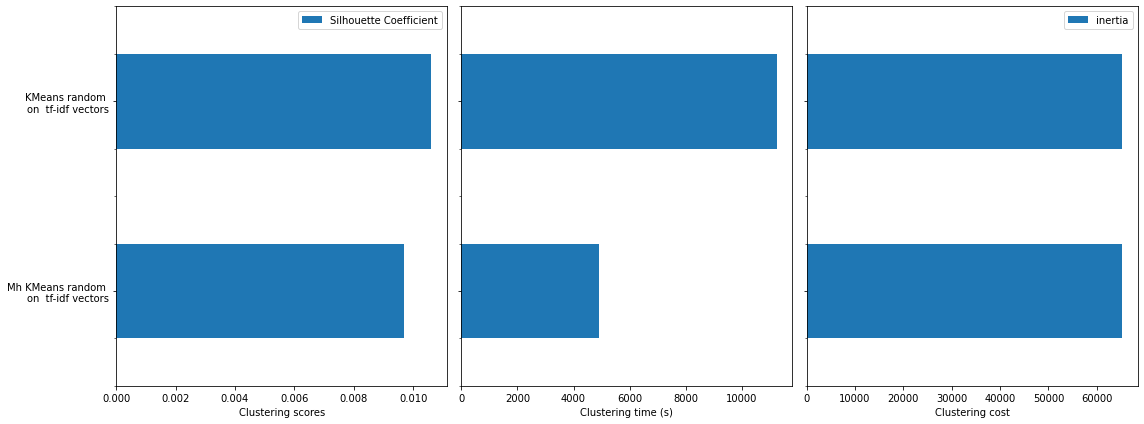

In [28]:


# Plot
import matplotlib.pyplot as plt
import pandas as pd

fig, (ax0, ax1,ax2) = plt.subplots(ncols=3, figsize=(16, 6), sharey=True)

df = pd.DataFrame(evaluations[::-1]).set_index("estimator")
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")

df.drop(
    ["train_time",'inertia'],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")

df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")


df[['inertia']].plot.barh(ax=ax2,xerr=df_std)
ax2.set_xlabel("Clustering cost")
ax2.set_ylabel("")


plt.tight_layout()
plt.savefig("snappFood_30_4Algo2.png")
plt.savefig('snappFood_30_4Algo2.pdf')

plt.show()

